<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Clustering problems
- $k$-means clustering
- Voronoi tesselation

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...
<img src="files/clusters.png" align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<!--<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left /> -->

In [1]:
# deal with memory leak in sklearn on Windows
import os
os.environ['OMP_NUM_THREADS'] = '1'

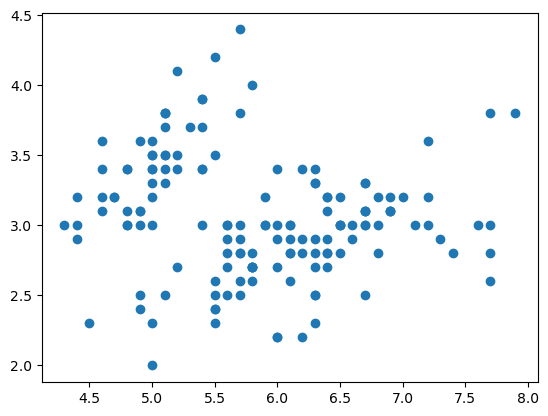

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

plt.scatter(X[:,0],X[:,1]);

## Types of Algorithms

- Flat

>1. Start with a random partitioning
>2. Iterate to improve the grouping

- Hierarchical

>1. Greedy grouping of closest: bottom up
>2. Greedy splitting of farthest: top down

### Flat example

<img src=files/kmeans.gif>
<!--
<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300> -->

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm


### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$
><br>
><br>
>$\displaystyle  \hat{{C}} = \textrm{arg}\min_{{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ \lvert\!\lvert x-\mu_i\rvert\!\rvert^2 \right] $
><br>
><br>
> where 
><br>
><br>
>$\displaystyle  \mu_i = \frac{1}{\lvert{C_i}\rvert}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>1. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

### Animation

<!--<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif align=left width=300>-->
<img src=files/kmeans.gif align=left width=300>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

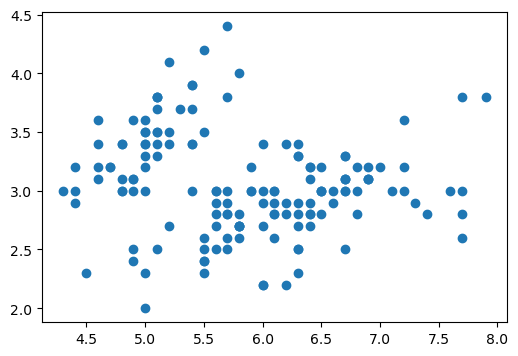

In [3]:
plt.figure(figsize=(6,6)); ax=plt.subplot(aspect='equal')
plt.scatter(X[:,0],X[:,1]);

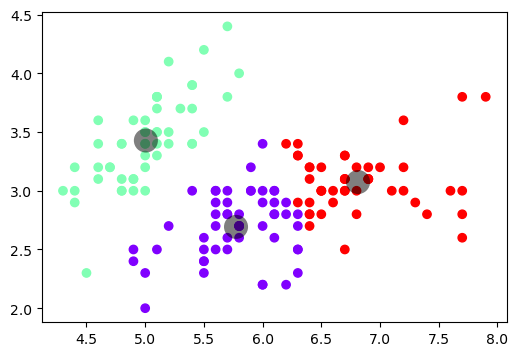

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=3, n_init=100)
kmeans.fit(X)

plt.figure(figsize=(6,6)); ax=plt.subplot(aspect='equal')
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=plt.cm.rainbow);

C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

In [5]:
kmeans.inertia_

37.0507021276596

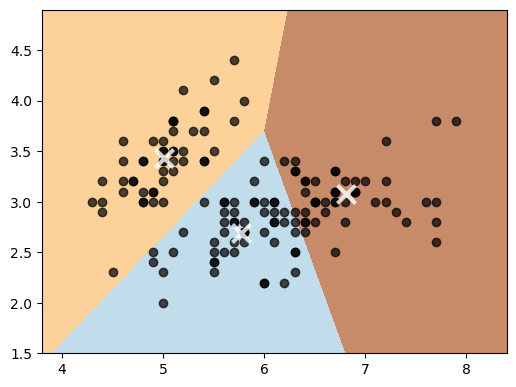

In [6]:
# Step size of the mesh. 
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
plt.figure(figsize=(6,6)); 
plt.subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

## Detour: Voronoi Tessellation & Delaunay Triangulation

<!-- img src=http://christophermanning.org/images/2012/12/59dfbaa41a678cd39a4cc5b94ab8919740e51d9c.png align=left width=600-->

<img src="files/59dfbaa41a678cd39a4cc5b94ab8919740e51d9c.png" align=left width=600>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

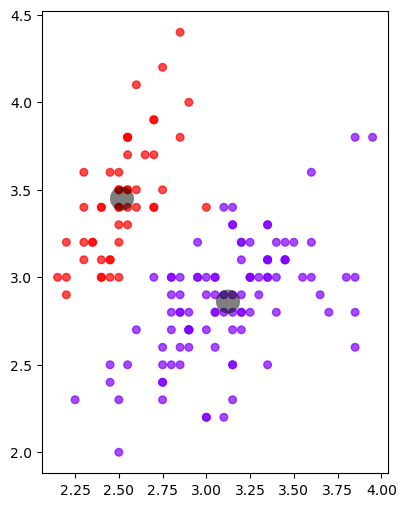

In [7]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

plt.figure(figsize=(6,6)); ax=plt.subplot(aspect='equal')
plt.scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=plt.cm.rainbow);
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Exercise

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200, 3)

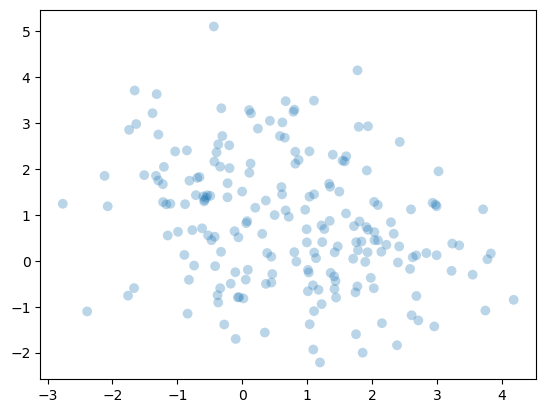

In [8]:
X = np.loadtxt('files/Class-Clusters.csv', delimiter=',')
plt.scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

In [9]:
from sklearn.cluster import KMeans

1 2636.361816407934 -2636.3618164079344
2 894.8485584691716 -894.8485584691715
3 565.9146431928178 -565.9146431928178
4 504.06743146312067 -504.0674314631206
5 453.5799452793018 -453.5799452793019
6 409.90227183089394 -409.90227183089394
7 377.2001725667827 -377.2001725667826
8 343.1090968265772 -343.1090968265772
9 316.1838758580874 -316.18387585808733


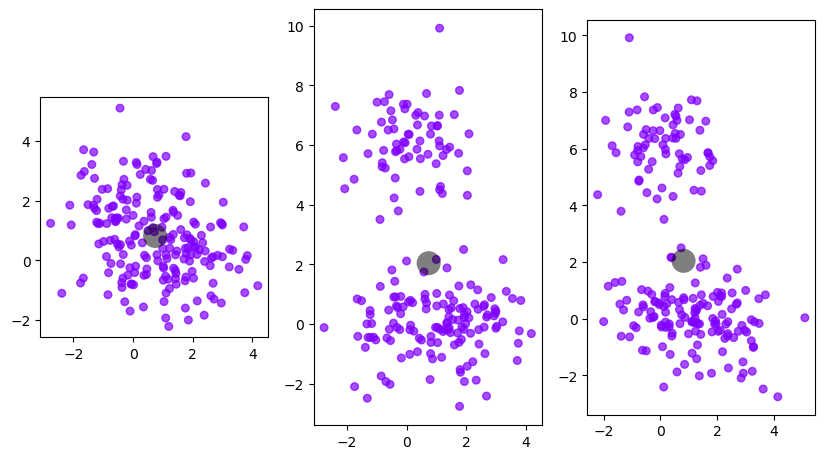

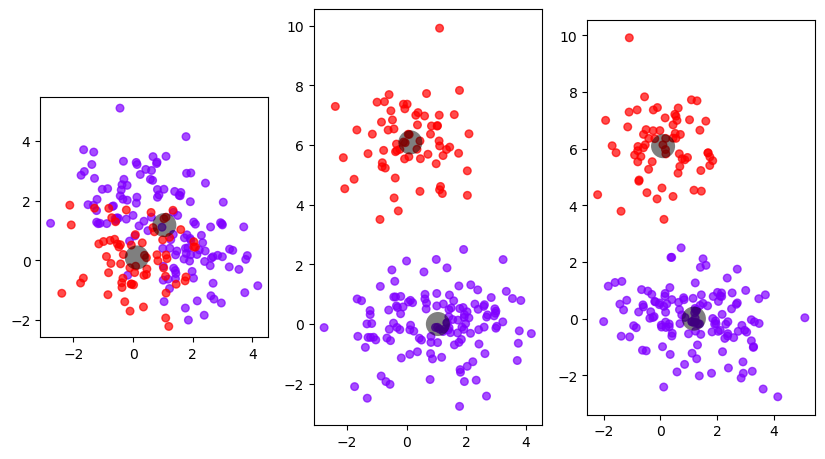

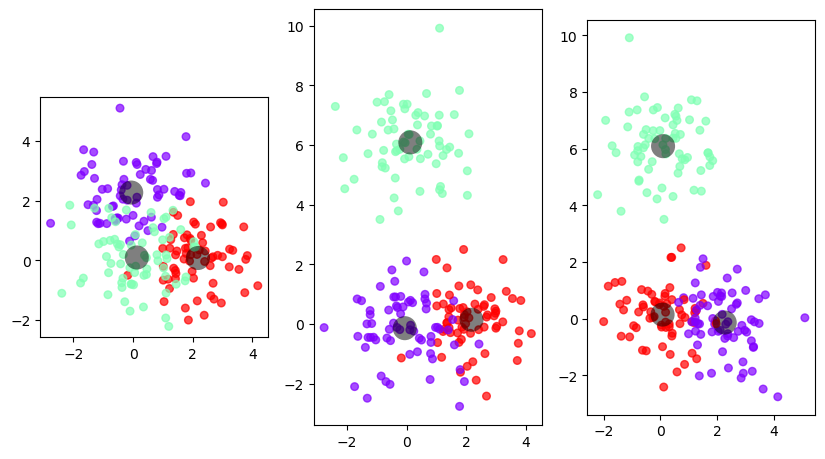

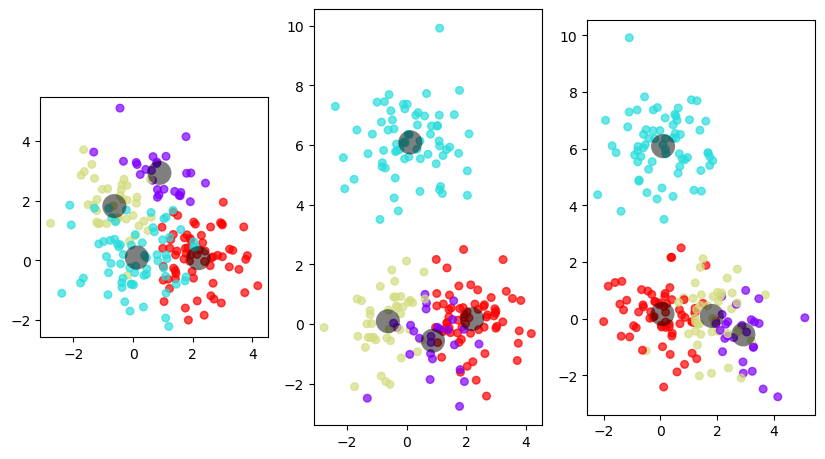

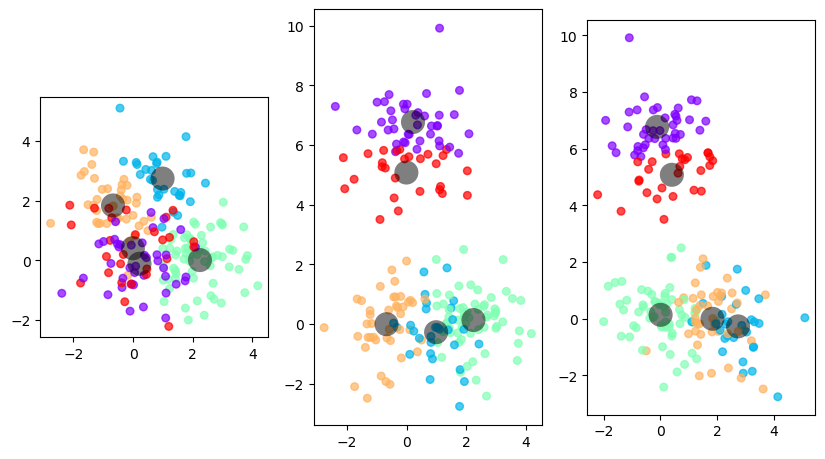

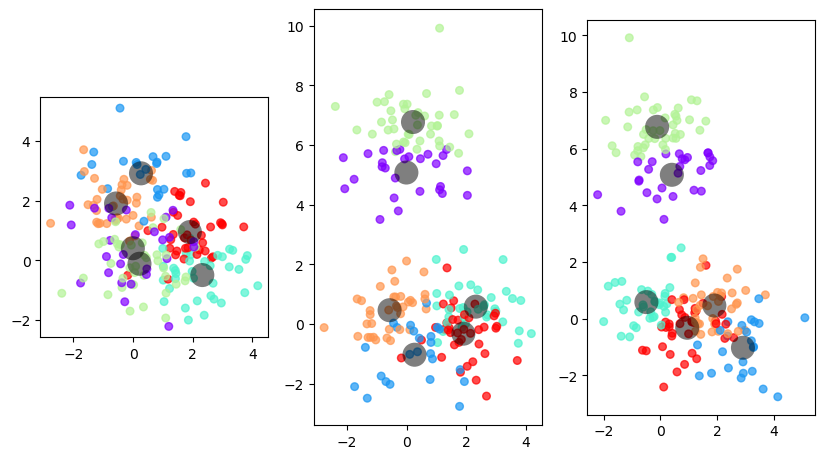

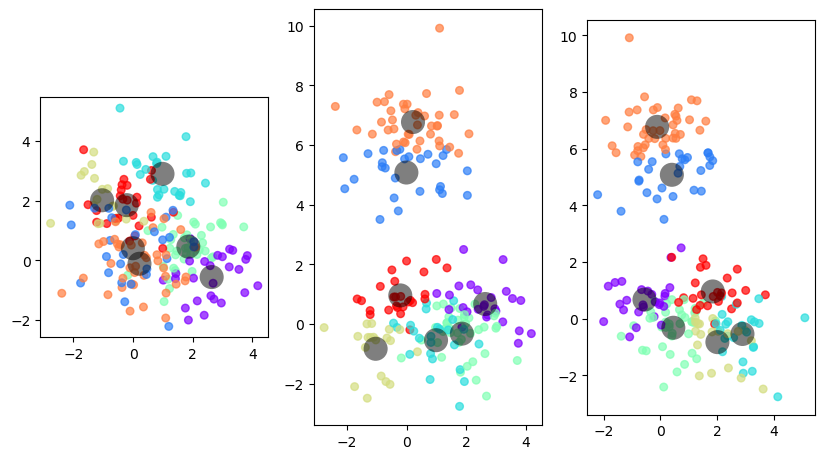

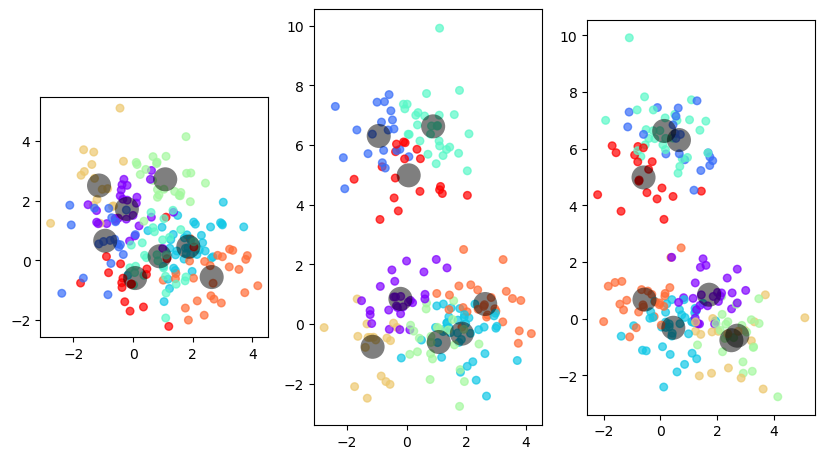

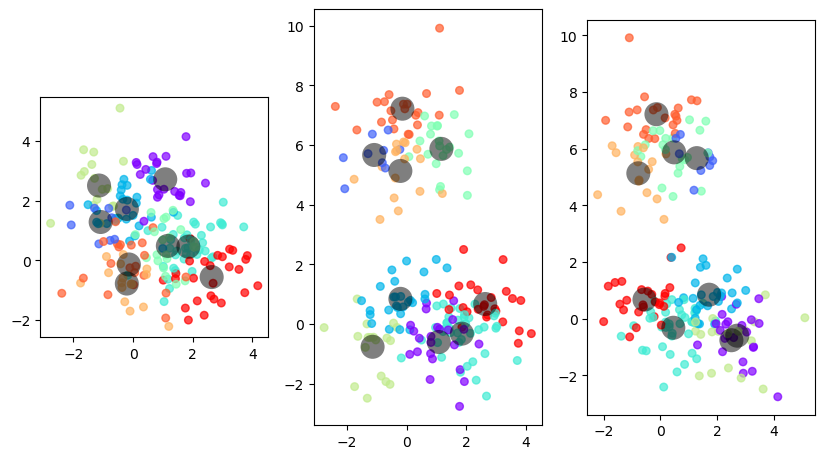

In [10]:
klist = []
slist = []

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters,n_init=100,init='k-means++')
    kmeans.fit(X)
    klist.append(n_clusters)
    slist.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,6)); 
    C, L = kmeans.cluster_centers_, kmeans.labels_
    for i,j in [(0,1),(0,2),(1,2)]:
        plt.subplot(1,3,(i+j), aspect='equal')
        plt.scatter(X[:,i],X[:,j],c= L, marker='o',s= 30,alpha=0.7,cmap=plt.cm.rainbow);
        plt.scatter(C[:,i],C[:,j],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');
    print (n_clusters, kmeans.inertia_, kmeans.score(X))

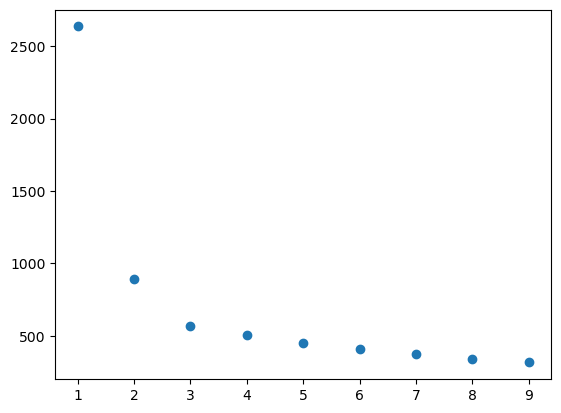

In [11]:
plt.plot(klist,slist, 'o');

## $k$-medians clustering

Replace mean with median for cluster centers <br>
Also, Euclidean ($L_2$) vs Taxicab ($L_1$) distance 